In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import cv2

In [27]:
def grayImg(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray
def bilateralFilterImg(img):
    gray = grayImg(img)
    blurred = cv2.bilateralFilter(gray,10,50,50)
    return blurred

In [28]:
def HoughCirclesImg(blurred, img):
    minDist = 100
    param1 = 30 #500
    param2 = 20 #200 #smaller value-> more false circles
    minRadius = 5
    maxRadius = 200 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    # circleImg = img
    # rectangleImg = img
    # if circles is not None:
    #     circles = np.uint16(np.around(circles))
    #     for i in circles[0,:]:
    #         cv2.circle(circleImg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.rectangle(img, (i[0]-i[2], i[1]+i[2]), (i[0]+i[2], i[1]-i[2]), (0, 255, 0), 1)
    print(circles[0][0])
    return img
    

[150 100  39]


(([], []), ([], []))

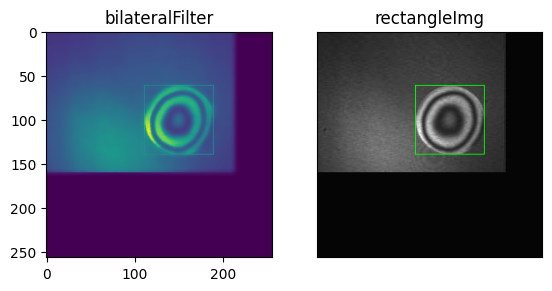

In [29]:
img = cv2.imread('image/11.JPG', 1)
rectangleImg = HoughCirclesImg(bilateralFilterImg(img), img)
plt.subplot(121),plt.imshow(bilateralFilterImg(img)),plt.title('bilateralFilter')
# plt.subplot(132),plt.imshow(circleImg),plt.title("circleImg")
plt.subplot(122),plt.imshow(rectangleImg),plt.title("rectangleImg")

plt.xticks([]), plt.yticks([])

[154 104  36]


C:\Users\letan\AppData\Local\Temp\ipykernel_10048\53100332.py:19: RuntimeWarning: overflow encountered in scalar subtract
  cv2.rectangle(img, (i[0]-i[2], i[1]+i[2]), (i[0]+i[2], i[1]-i[2]), (0, 255, 0), 1)


(([], []), ([], []))

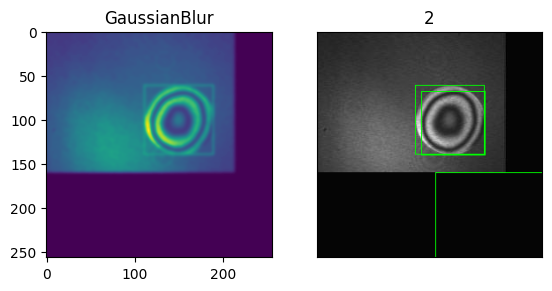

In [30]:

blurred_image = cv2.GaussianBlur(grayImg(img), (9, 9), 0)
img2 = HoughCirclesImg(blurred_image, img)
plt.subplot(121),plt.imshow(blurred_image),plt.title('GaussianBlur')
plt.subplot(122),plt.imshow(img2),plt.title('2')
plt.xticks([]), plt.yticks([])